<h3 style='color:pink'>Exercise: GPU performance for fashion mnist dataset</h3>

You need to write code wherever you see `your code goes here` comment. You are going to do image classification for fashion mnist dataset and then you will benchmark the performance of GPU vs CPU for 1 hidden layer and then for 5 hidden layers. You will eventually fill out this table with your performance benchmark numbers


| Hidden_Layer | CPU | GPU  |
|:------|:------|:------|
| 1 | 8.06s | 8.85s |
| 5 | 19.8s | 14.8s |

In [39]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [40]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [41]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
train_images.shape

(60000, 28, 28)

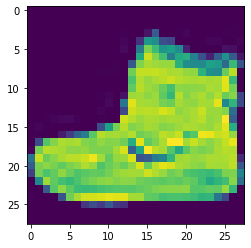

In [43]:
plt.imshow(train_images[0])

In [44]:
train_labels[0]

9

In [45]:
class_names[train_labels[0]]

'Ankle boot'

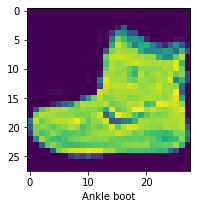

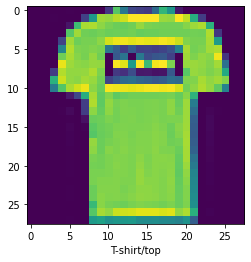

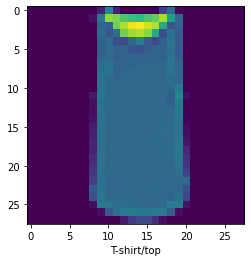

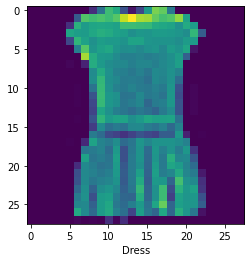

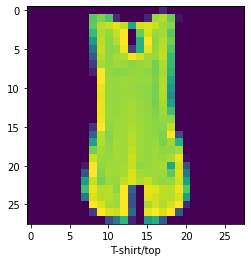

In [46]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [47]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

train_images_scaled.shape

(60000, 28, 28)

In [48]:
def get_model(hidden_layers=1):
    layers = []
    # Your code goes here-----------START
    # Create Flatten input layers
    layers.append(keras.layers.Flatten(input_shape=(28, 28,)))
    # Create hidden layers that are equal to hidden_layers argument in this function
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation="relu"))
    # Create output
    layers.append(keras.layers.Dense(10, activation="sigmoid"))

    # Your code goes here-----------END
    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [49]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 925us/step - loss: 0.4745 - accuracy: 0.8292
Epoch 2/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.3574 - accuracy: 0.8692
Epoch 3/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.3218 - accuracy: 0.8816
Epoch 4/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.2992 - accuracy: 0.8888
Epoch 5/5
1875/1875 [==============================] - 2s 953us/step - loss: 0.2790 - accuracy: 0.8969


In [50]:
np.argmax(model.predict(test_images_scaled)[52])

5

In [51]:
test_labels[52]

5

In [52]:
tf.config.experimental.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<h4 style="color:pink">5 Epochs performance comparison for 1 hidden layer</h4>

In [53]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    # your code goes here
    cpu_model = get_model()
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 860us/step - loss: 0.4789 - accuracy: 0.8274
Epoch 2/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.3567 - accuracy: 0.8705
Epoch 3/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.3215 - accuracy: 0.8823
Epoch 4/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.2990 - accuracy: 0.8916
Epoch 5/5
1875/1875 [==============================] - 2s 816us/step - loss: 0.2767 - accuracy: 0.8970
8.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [54]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    # your code goes here
    gpu_model = get_model()
    gpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 917us/step - loss: 0.4778 - accuracy: 0.8306
Epoch 2/5
1875/1875 [==============================] - 2s 914us/step - loss: 0.3575 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 2s 918us/step - loss: 0.3239 - accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 2s 921us/step - loss: 0.2986 - accuracy: 0.8890
Epoch 5/5
1875/1875 [==============================] - 2s 919us/step - loss: 0.2788 - accuracy: 0.8962
8.85 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h4 style="color:pink">5 Epocs performance comparison with 5 hidden layers</h4>

In [55]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    # your code here
    cpu_model = get_model(5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5149 - accuracy: 0.8144
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3892 - accuracy: 0.8610
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3523 - accuracy: 0.8738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3250 - accuracy: 0.8824
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3049 - accuracy: 0.8894
19.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [56]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    # your code here
    gpu_model = get_model(5)
    gpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5121 - accuracy: 0.8155
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3892 - accuracy: 0.8595
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3560 - accuracy: 0.8711
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3243 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3091 - accuracy: 0.8879
14.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
